<a href="https://colab.research.google.com/github/sandeepangh782/Analysis-of-Spotify-Dataset/blob/main/Multivariate%20Analysis%20of%20Suicide%20Rate%20from%201985%20to%202016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About the dataset:** This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

**Problem Statement:** The suicide rate in lots of countries have been quite high for many years, including the developing and developed countries. At the begining, we'll find out the key factors of high suicide rate.

Connecting Gdrive to notebook

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Installing plotly_express in the notebook

In [ ]:
!pip install plotly_express

importing the necessary libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import plotly_express as px
import itertools
%matplotlib inline
from scipy import stats

# setting up plot style
style.use('seaborn-poster')
style.use('fivethirtyeight')

<ipython-input-77-775aebf9ff7e>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


Descriptive Analysis

Reading the suicide rate from 1985 to 2016 dataset (.csv file) from gdrive

In [42]:
df = pd.read_csv(r'/content/gdrive/MyDrive/Multivariate/master.csv')

displays the first 10 rows of the DataFrame

In [43]:
df.head(10)


country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   
5  Albania  1987  female    75+ years            1       35600   
6  Albania  1987  female  35-54 years            6      278800   
7  Albania  1987  female  25-34 years            4      257200   
8  Albania  1987    male  55-74 years            1      137500   
9  Albania  1987  female   5-14 years            0      311000   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   
5               2.81  Albania1987           NaN      2,156,624,900   
6               2.15  Albania1987           NaN      2,156,624,900   
7               1.56  Albania1987           NaN      2,156,624,900   
8               0.73  Albania1987           NaN      2,156,624,900   
9               0.00  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers  
5                 796  G.I. Generation  
6                 796           Silent  
7                 796          Boomers  
8                 796  G.I. Generation  
9                 796     Generation X

Provides the statistical information of the dataframe.

count: It indicates the number of data points available for analysis in each column.

mean: It represents the average value of the data in that column.

std: It measures the amount of variation or dispersion in the data points around the mean.

min: It shows the smallest value present in the data.

25%: It represents the value below which 25% of the data falls.

50%: It represents the value below which 50% of the data falls.

75%: It represents the value below which 75% of the data falls.

max: It shows the largest value present in the data.



In [13]:
df.describe()

year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_per_capita ($)  
count   8364.000000        27820.000000  
mean       0.776601        16866.464414  
std        0.093367        18887.576472  
min        0.483000          251.000000  
25%        0.713000         3447.000000  
50%        0.779000         9372.000000  
75%        0.855000        24874.000000  
max        0.944000       126352.000000

Checking for the data types of the columns

In [80]:
print(df.dtypes)

country            object
year                int64
sex                object
age                object
suicides_no         int64
population          int64
suicides_pop      float64
country-year       object
HDI_for_year      float64
gdp_for_year       object
gdp_per_capita      int64
generation         object
suicide_ratio     float64
dtype: object


Checking for null values in the dataset

In [81]:
print(df.isnull().sum())

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides_pop          0
country-year          0
HDI_for_year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
suicide_ratio         0
dtype: int64


Removing the column "**HDI_for_year**"

In [84]:
df.drop('HDI_for_year',axis=1, inplace=True)

In [87]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'country-year', 'gdp_for_year', 'gdp_per_capita',
       'generation', 'suicide_ratio'],
      dtype='object')

Countries listed in the dataset

In [90]:
countries=df['country'].unique()
print(countries)

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

Modifying the column names for EDA purposes

In [72]:
df.rename(columns={"suicides/100k pop":"suicides_pop","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",
                    "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)
print(df.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation', 'suicide_ratio'],
      dtype='object')


Visualization

Univariate Analysis

Population

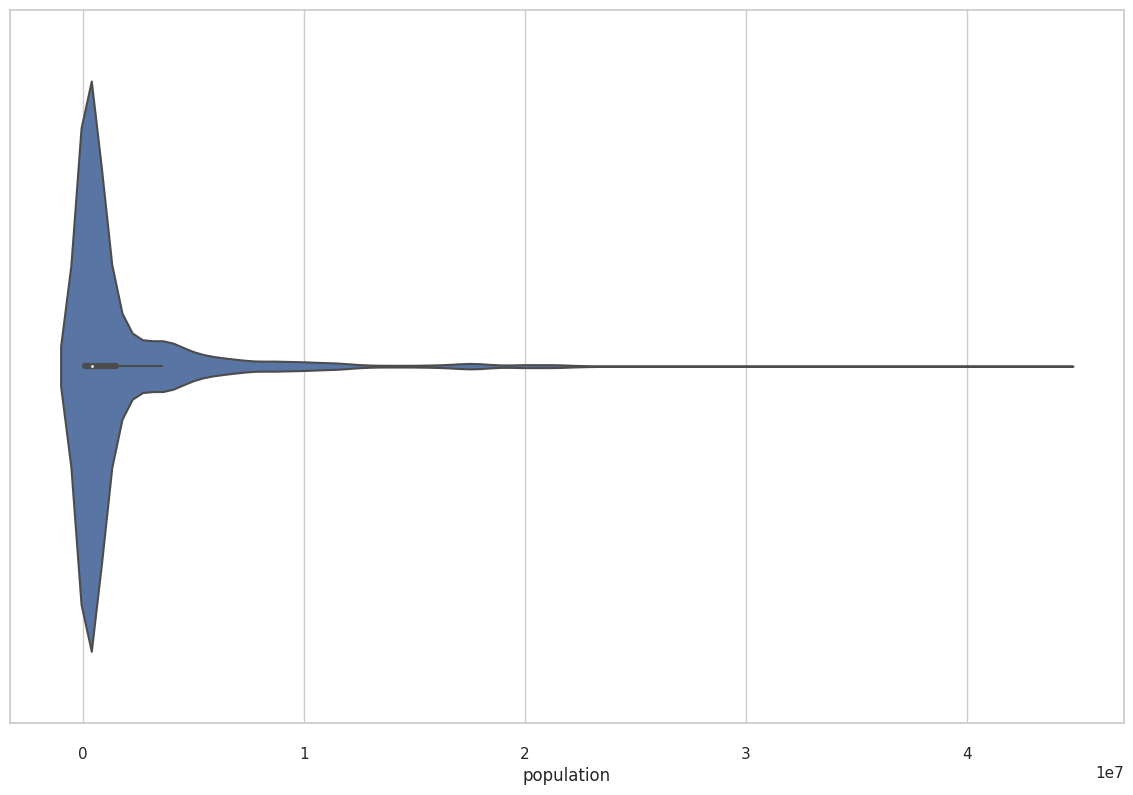

In [55]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=df["population"])

Population seems to be dense around the median.

Gender Distribution

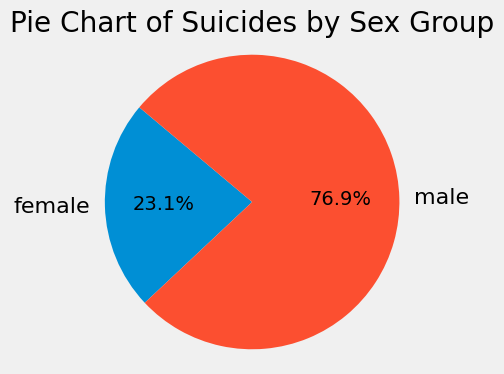

In [21]:
sex_group = df.groupby("sex")["suicides_no"].sum()


plt.figure(figsize=(4, 4))
plt.pie(sex_group, labels=sex_group.index, autopct='%1.1f%%', startangle=140)


plt.title("Pie Chart of Suicides by Sex Group")


plt.axis('equal')
plt.show()

As per the chart we can say  males have more suicide rates than female

Country

<Axes: xlabel='country'>

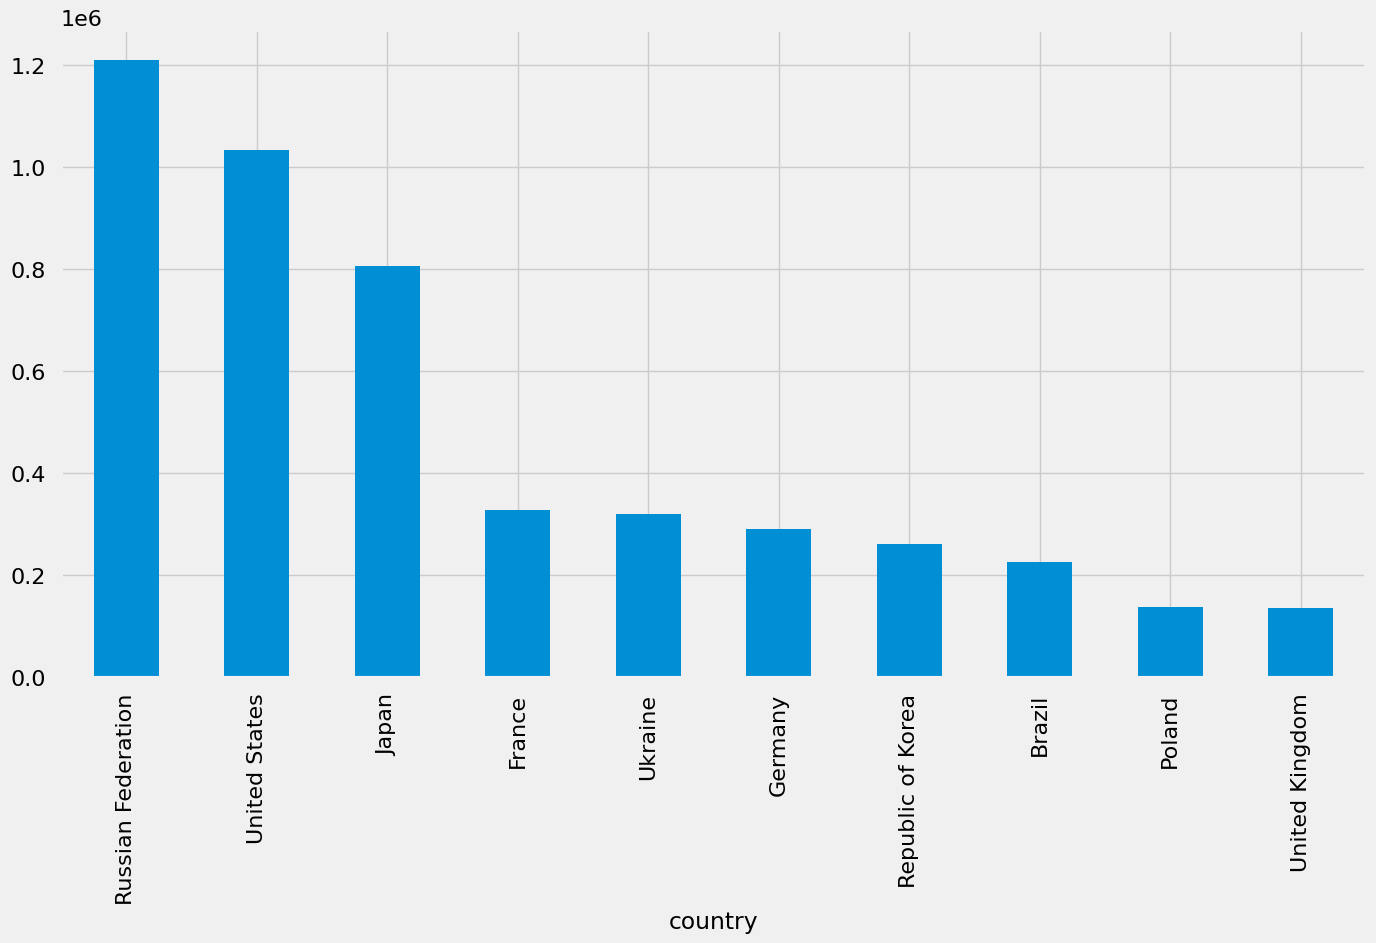

In [44]:
df1 = df.groupby(['country'])['suicides_no'].sum().sort_values(ascending=False).head(10)
df1.plot.bar(figsize=(15,8))

We can see that the top three countries with highest suicide count are - Russia, United States and Japan.

Year wise suicide rate

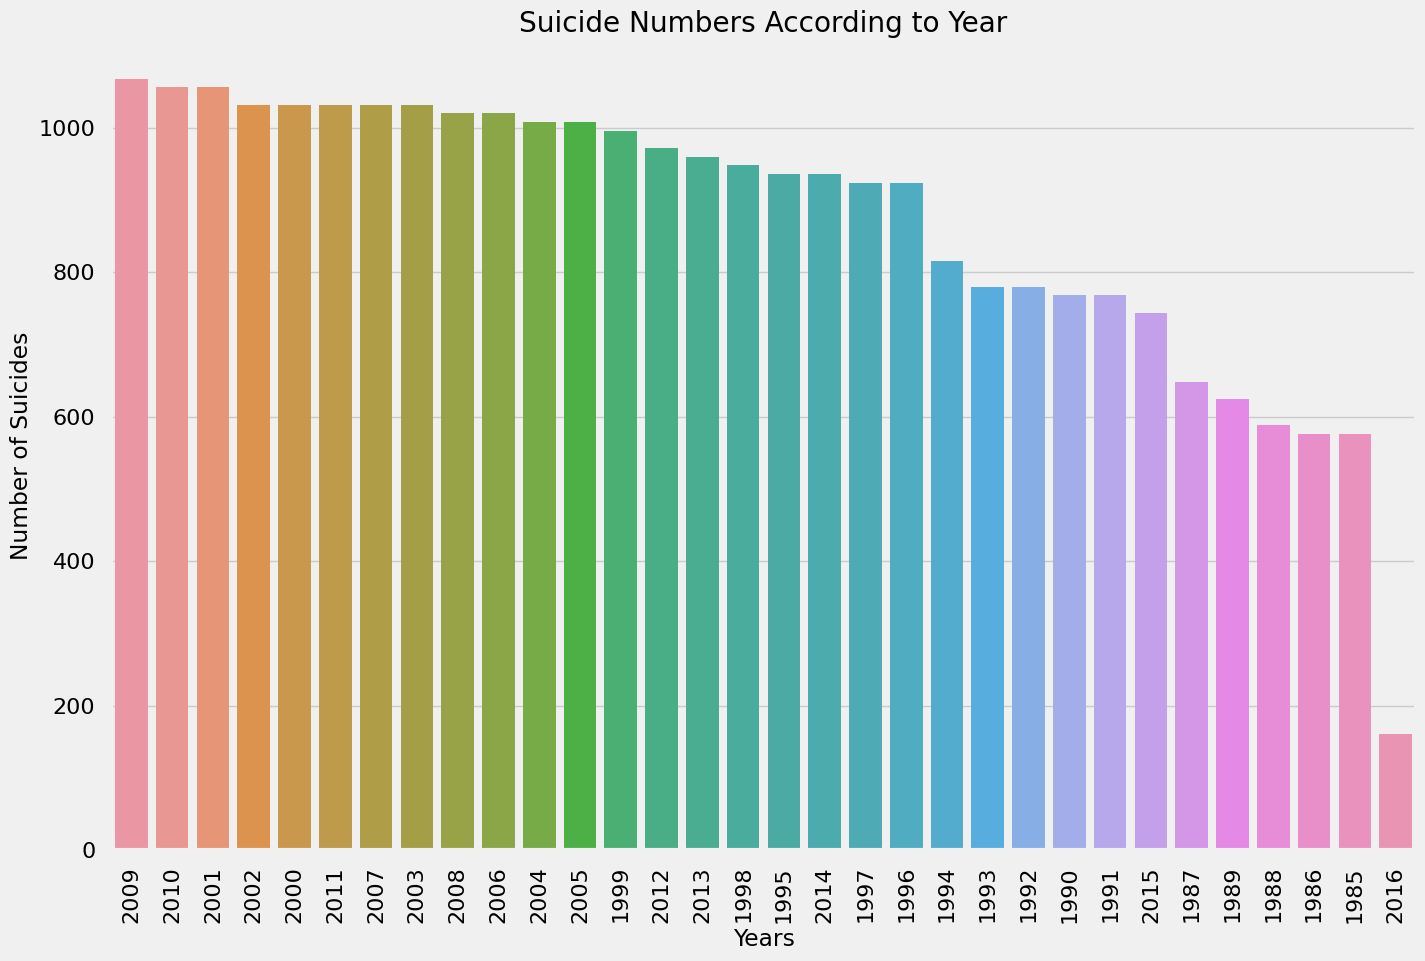

In [19]:

plt.figure(figsize=(15, 10))
sns.countplot(x = "year",data = df, order = df["year"].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel("Number of Suicides")
plt.title("Suicide Numbers According to Year")
plt.show()

As per the chart we can see year 2009 has more no of suicide and 2016 has least no of suicide

 Number of suicides as per the **age**

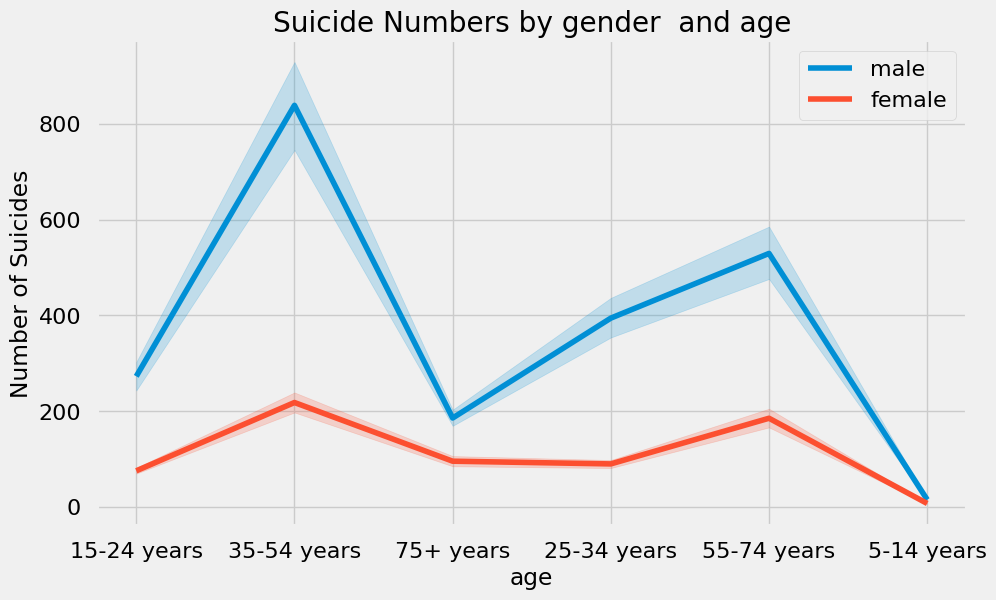

In [45]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="age", y = "suicides_no", hue = "sex")


plt.xlabel("age")
plt.ylabel("Number of Suicides")
plt.title("Suicide Numbers by gender  and age")

plt.legend()

plt.show()

From the graph we can understand that in both male and female people from age 34-54 commit more suicide and the least rate is in the age group of 5-14 yrs in both male and female.

Top 5 countries with suicide rates between 1985 to 2016, gender-wise

<Axes: xlabel='country'>

<Figure size 800x600 with 0 Axes>

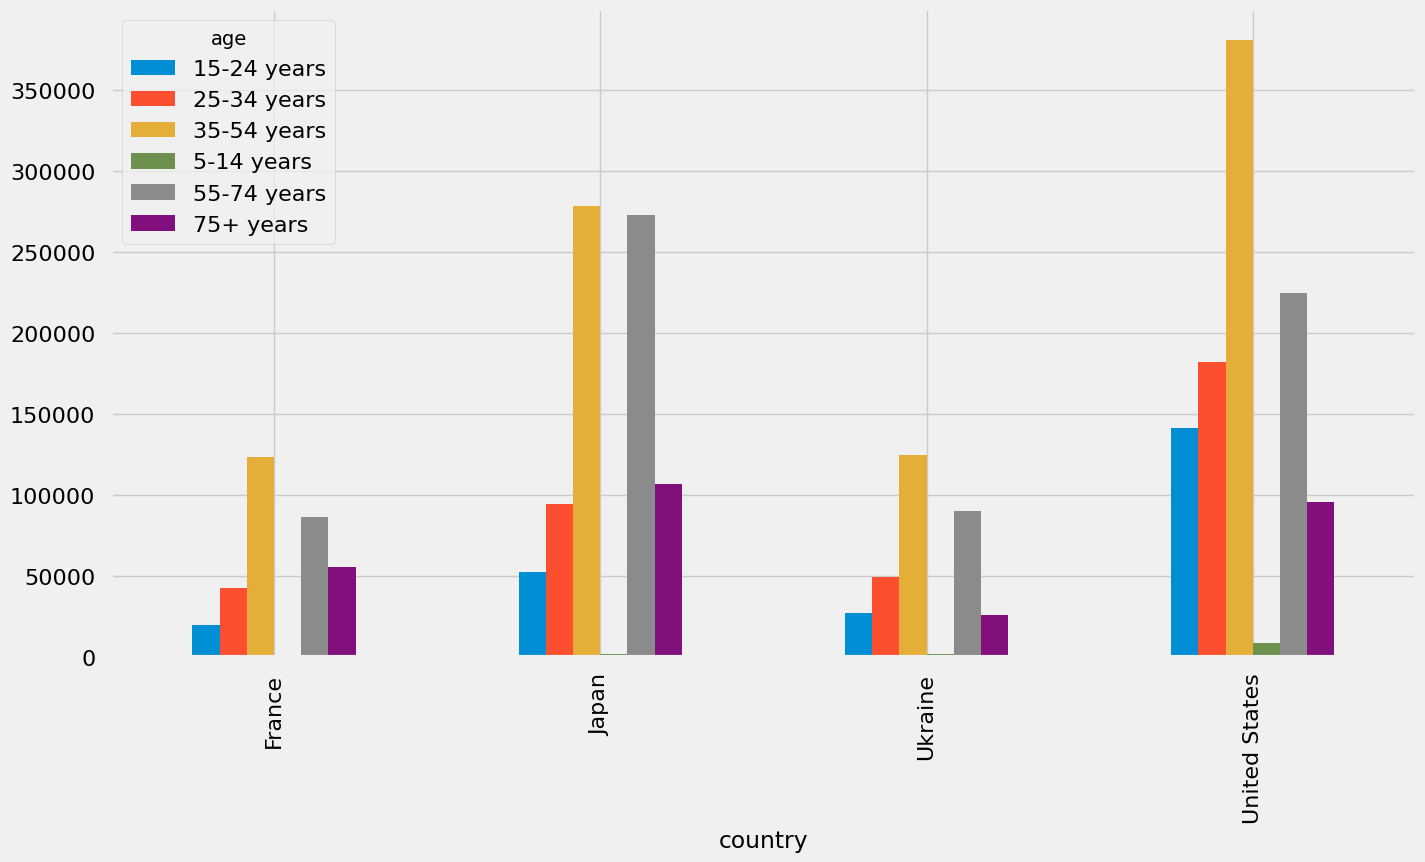

In [49]:
plt.figure(figsize=(8,6))
suicide_df=df
df2 = suicide_df.loc[((suicide_df.country=='Russia') | (suicide_df.country=='United States')
                     | (suicide_df.country=='Japan') | (suicide_df.country=='France')
                    | (suicide_df.country=='Ukraine'))].groupby(['country','age'])['suicides_no'].sum().unstack(fill_value=0).head(10)
df2.plot.bar(figsize=(15,8))

We can see from the graph that the age group of 35-54years have commited the most suicides majorly in USA

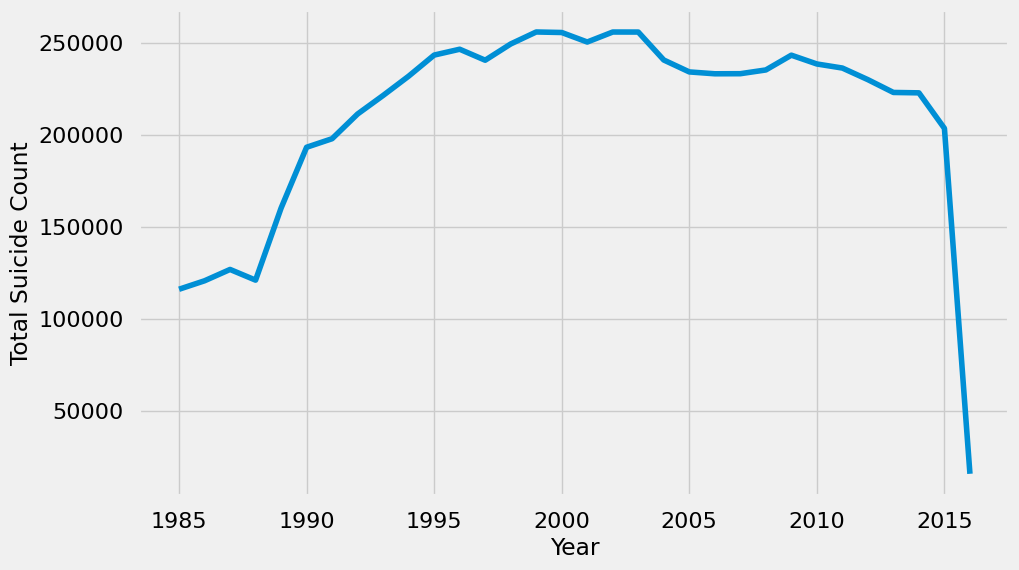

In [46]:
plt.figure(figsize=(10, 6))


df_time = df.groupby(["year"]).suicides_no.sum()
sns.lineplot(data = df_time)
plt.xlabel("Year")
plt.ylabel("Total Suicide Count")
plt.show()


The suicide rate seems to be increasing between 1985-2000 and then slight decrease by 2015.
The significant difference between 2015-2016 might be because of less records in 2016 rather than any significant change in the suicide rate.

Bi-variate

age vs population

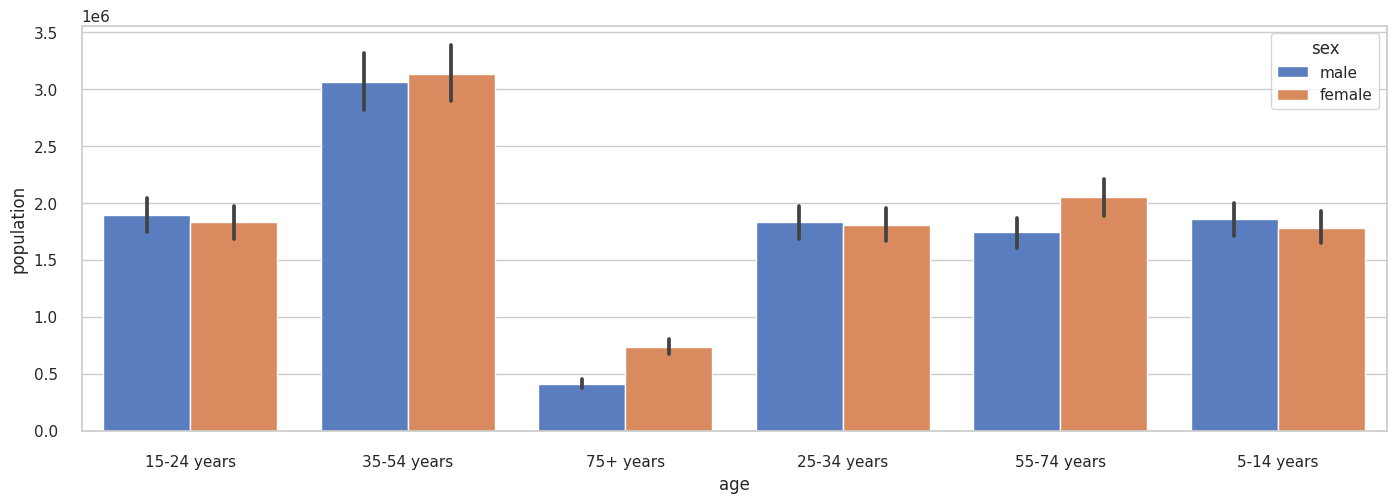

In [52]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="age", y="population", hue="sex", data=suicide_df, palette="muted")

As we can see here, the population for people who have age 35-54 is more than any other category. This might be one of a reason for the suicide rate being more for this category. The sex ratio in every age category seems to be almost same.

Population vs generation

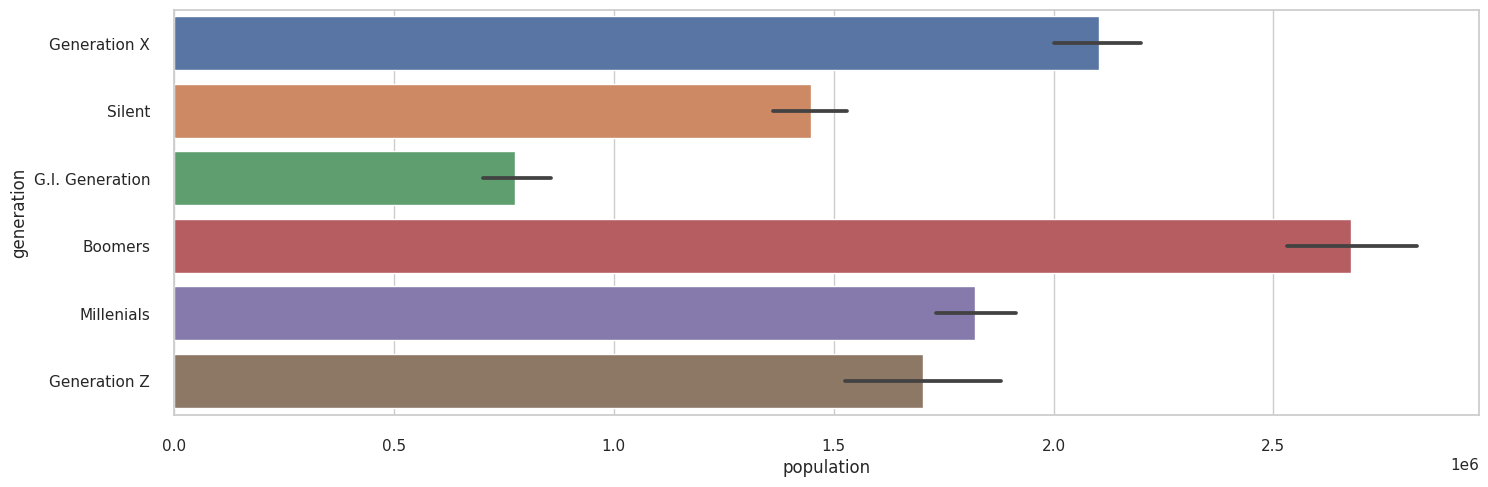

In [53]:
plt.figure(figsize=(15,5))
ax = sns.barplot(y="generation", x="population",data=suicide_df)

Boomers and Generation X seem to be more in suicidal count than other generations.

Sex vs Year

<ipython-input-59-a4e9d64f10e8>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_men, x='year', y='suicides_no', ci=None)
<ipython-input-59-a4e9d64f10e8>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_women, x='year', y='suicides_no', ci=None)


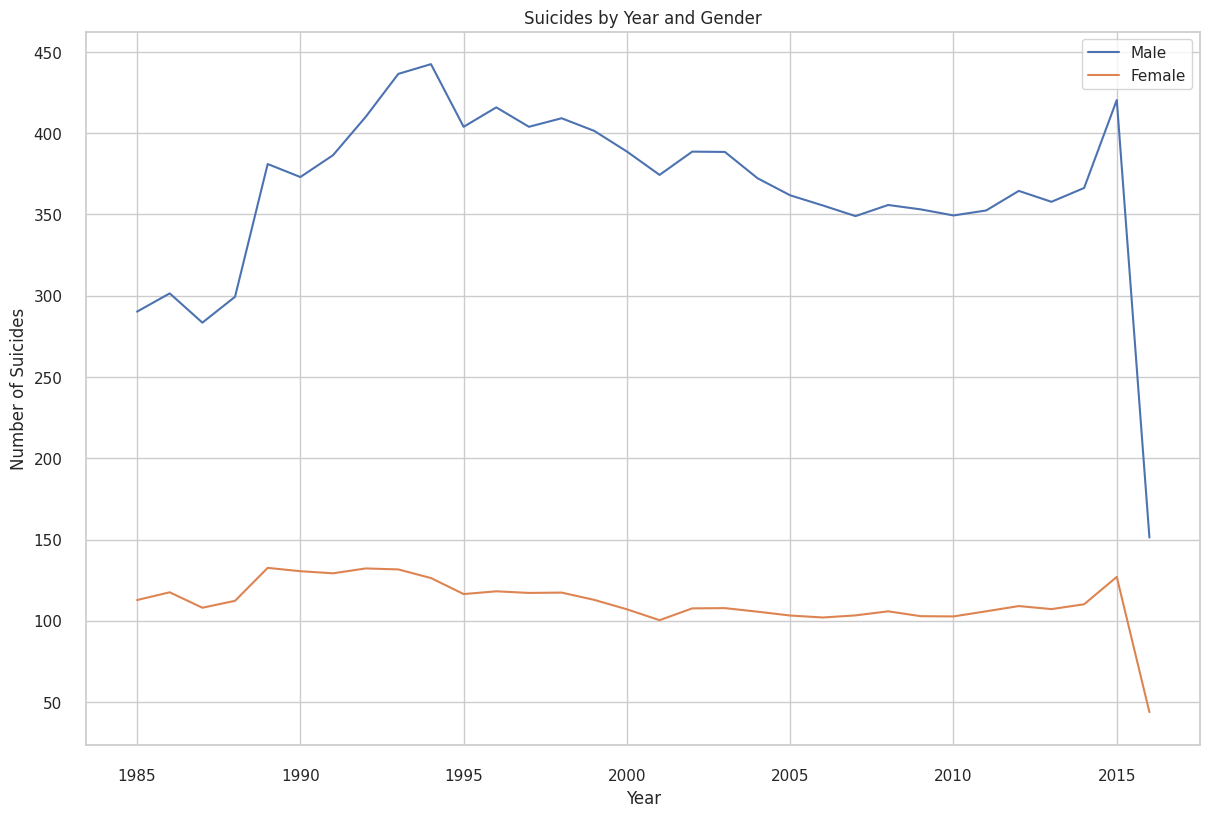

In [59]:
sns.lineplot(data=df_men, x='year', y='suicides_no', ci=None)
sns.lineplot(data=df_women, x='year', y='suicides_no', ci=None)
plt.legend(["Male", "Female"])
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.title('Suicides by Year and Gender')
plt.show()

No matter which year it is, the suicides number of male are about three times higher than of female.

Year vs suicide ratio for 10 countries

In [66]:
#finding the suicide ration per year and country list
df_suino = df.groupby(["country","year"])["suicides_no"].sum()
df_sum = df_suino.sort_index(ascending=True)[:] * 100

df_pop = df.groupby(["country","year"]).population.sum()
df_pop_sum = df_pop.sort_index(ascending=False)[:]

df_total = df_sum / df_pop_sum

country_dict={}
for country in df_total.index.get_level_values(0):
    if country not in country_dict.keys():
        country_dict[country] = df_total[country].mean()
    else:
        pass

tup = list(country_dict.items())
tup.sort(key= lambda pair:pair[1], reverse = True)

country_list = [a[0] for a in tup]
print(country_list)

['Lithuania', 'Russian Federation', 'Sri Lanka', 'Belarus', 'Hungary', 'Latvia', 'Kazakhstan', 'Slovenia', 'Estonia', 'Ukraine', 'Finland', 'Japan', 'Belgium', 'Austria', 'Guyana', 'Croatia', 'France', 'Mongolia', 'Serbia', 'Republic of Korea', 'Suriname', 'Switzerland', 'Czech Republic', 'Cuba', 'Poland', 'Bulgaria', 'Luxembourg', 'Uruguay', 'Sweden', 'Germany', 'New Zealand', 'Denmark', 'Norway', 'Iceland', 'Canada', 'Australia', 'Trinidad and Tobago', 'United States', 'Romania', 'Slovakia', 'Mauritius', 'Kyrgyzstan', 'Ireland', 'Singapore', 'Netherlands', 'El Salvador', 'Cabo Verde', 'Chile', 'Portugal', 'Puerto Rico', 'Spain', 'Aruba', 'Montenegro', 'Argentina', 'United Kingdom', 'Macau', 'Italy', 'Turkmenistan', 'Kiribati', 'Uzbekistan', 'Seychelles', 'Thailand', 'Israel', 'Costa Rica', 'Nicaragua', 'Saint Lucia', 'Ecuador', 'Belize', 'San Marino', 'Malta', 'Saint Vincent and Grenadines', 'Panama', 'Colombia', 'Brazil', 'Bosnia and Herzegovina', 'Greece', 'Mexico', 'Fiji', 'Paragu

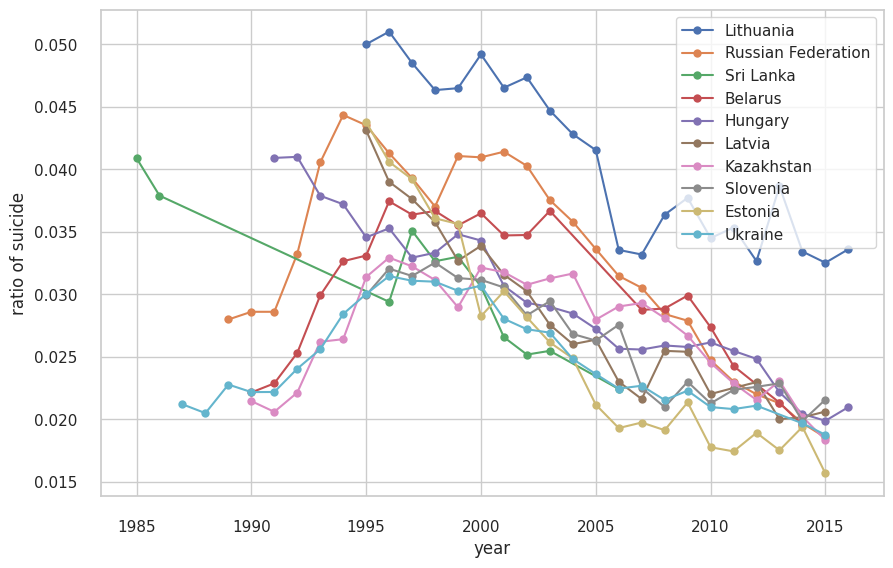

In [67]:
plt.figure(figsize = (9,6))
for country in country_list[:10]:
    plt.plot(df_total[country].index,df_total[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("ratio of suicide")
plt.legend()
plt.show()

It's clearly that the suicide rate of some top10 countries dramatically increased after 1990. In addition, the rate in others are still high during 1990 to 2000. The transition to the economy and democracy in former Soviet Union countries may be the main reasons.

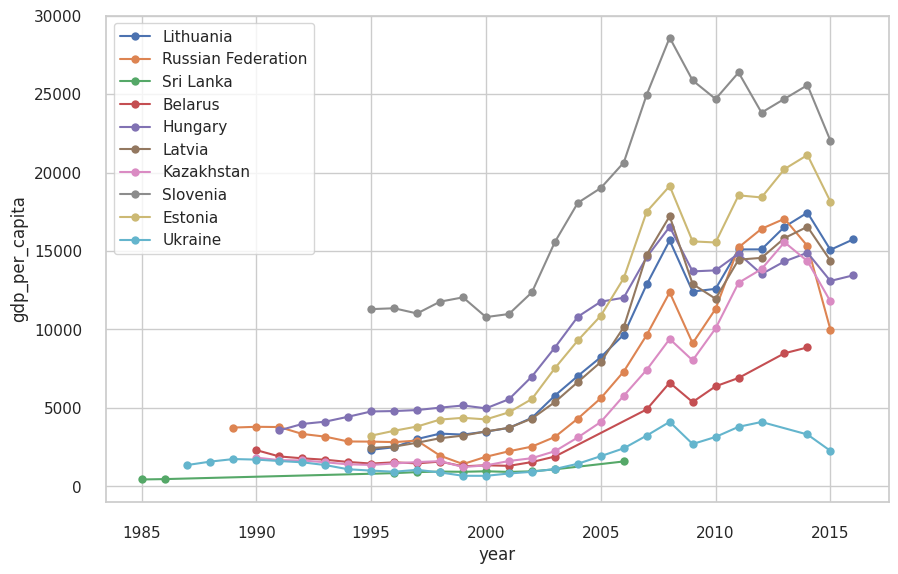

In [75]:
plt.figure(figsize = (9,6))
df_gdp = df.groupby(["country","year"]).gdp_per_capita.mean()
for country in country_list[:10]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("gdp_per_capita")
plt.legend()
plt.show()

From this image we can see that the gdp_per_capita has no differece during 1990 to 2000. In other words, the economic situation were remain stagnant and some countries got worse until 2002, after 2005, all countries' gdp start growing.

We also know that the whole gdp_per_capita dropped within 2008 because of the financial crisis. However, these ratio were still better than that before 2000. To see the relationship between suicide rate and gdp_per_capita, we plot the regression plot of two parameters.

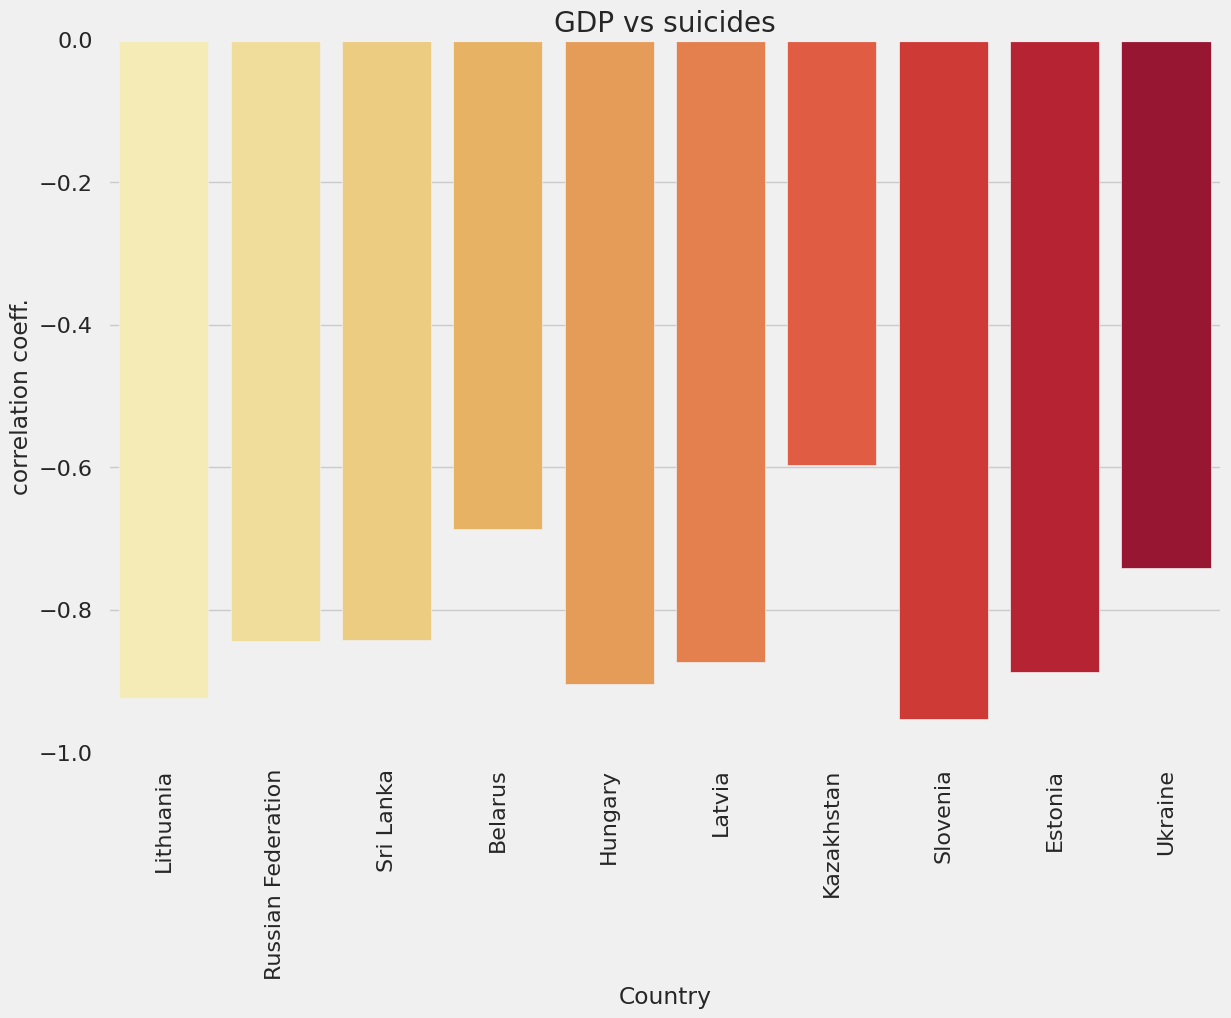

In [78]:
corr_eff = {}
for country in country_list[:10]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values,df_total[country].values)
    corr_eff[country] = float(r_value)

sns.barplot(x=list(corr_eff.keys()), y=list(corr_eff.values()), palette = "YlOrRd")
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("correlation coeff.")
plt.title("GDP vs suicides")
plt.show()

The suicide rate is highly correlated to the gdp_per_capita of top10 countries.
Therefore can be said that the GDP affects the suicide rate in a country in some way.



Multivariate analysis

<ipython-input-88-44a45f63506d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df[df.columns].corr()


[Text(0.5, 0, 'year'),
 Text(1.5, 0, 'suicides_no'),
 Text(2.5, 0, 'population'),
 Text(3.5, 0, 'suicides_pop'),
 Text(4.5, 0, 'gdp_per_capita'),
 Text(5.5, 0, 'suicide_ratio')]

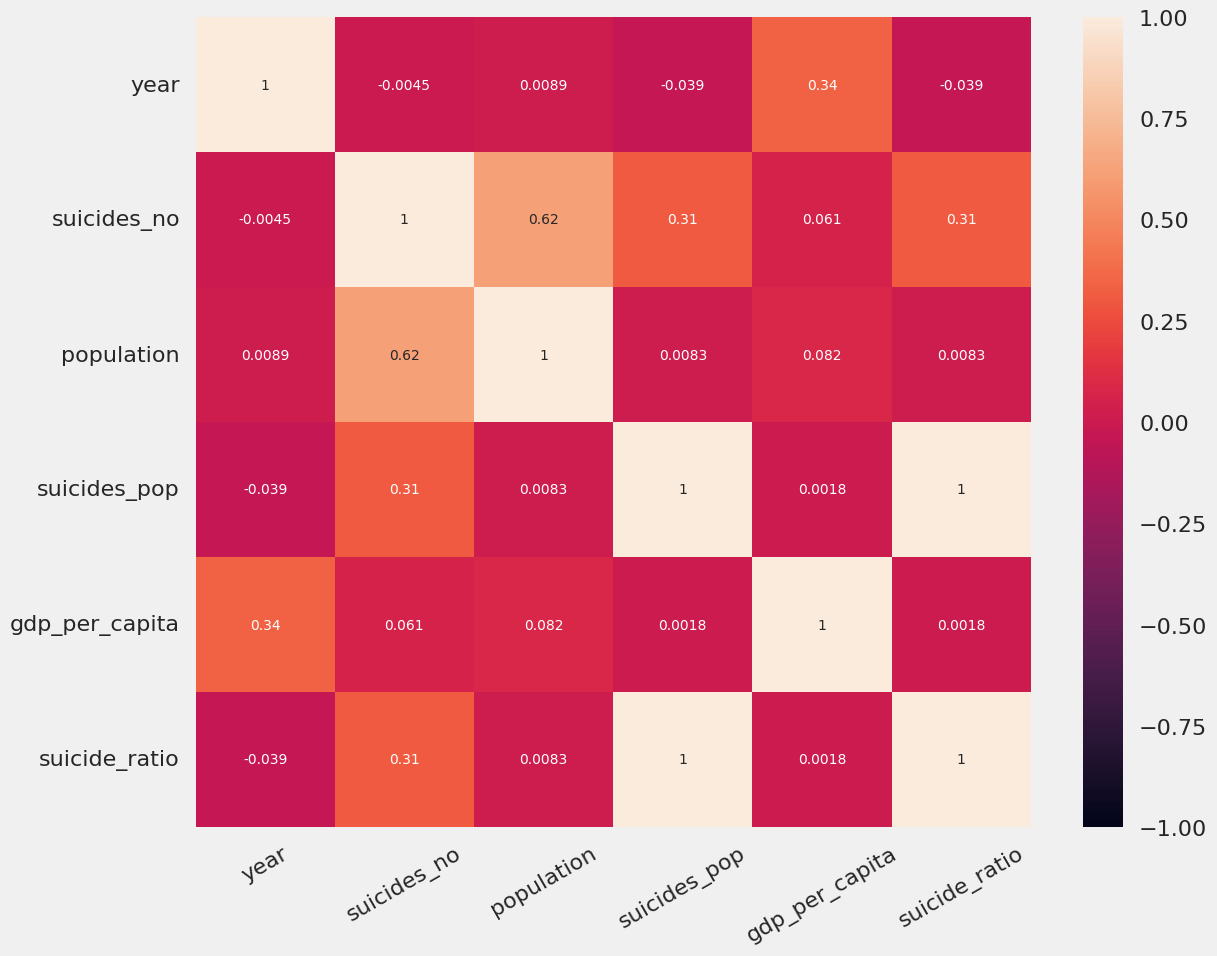

In [88]:
correlation = df[df.columns].corr()
plt.figure(figsize=(12, 10))
plot = sns.heatmap(correlation, vmin = -1, vmax = 1,annot=True, annot_kws={"size": 10})
plot.set_xticklabels(plot.get_xticklabels(), rotation=30)

Suicides_no and population these two features have a high positive correlation (close to +1), it suggests that they tend to increase or decrease together.

Although there was positive correlation in GDP for the top 10 countries but overall the correlation is close to zero therefore no linear relation between GDP per capita and sucide population.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


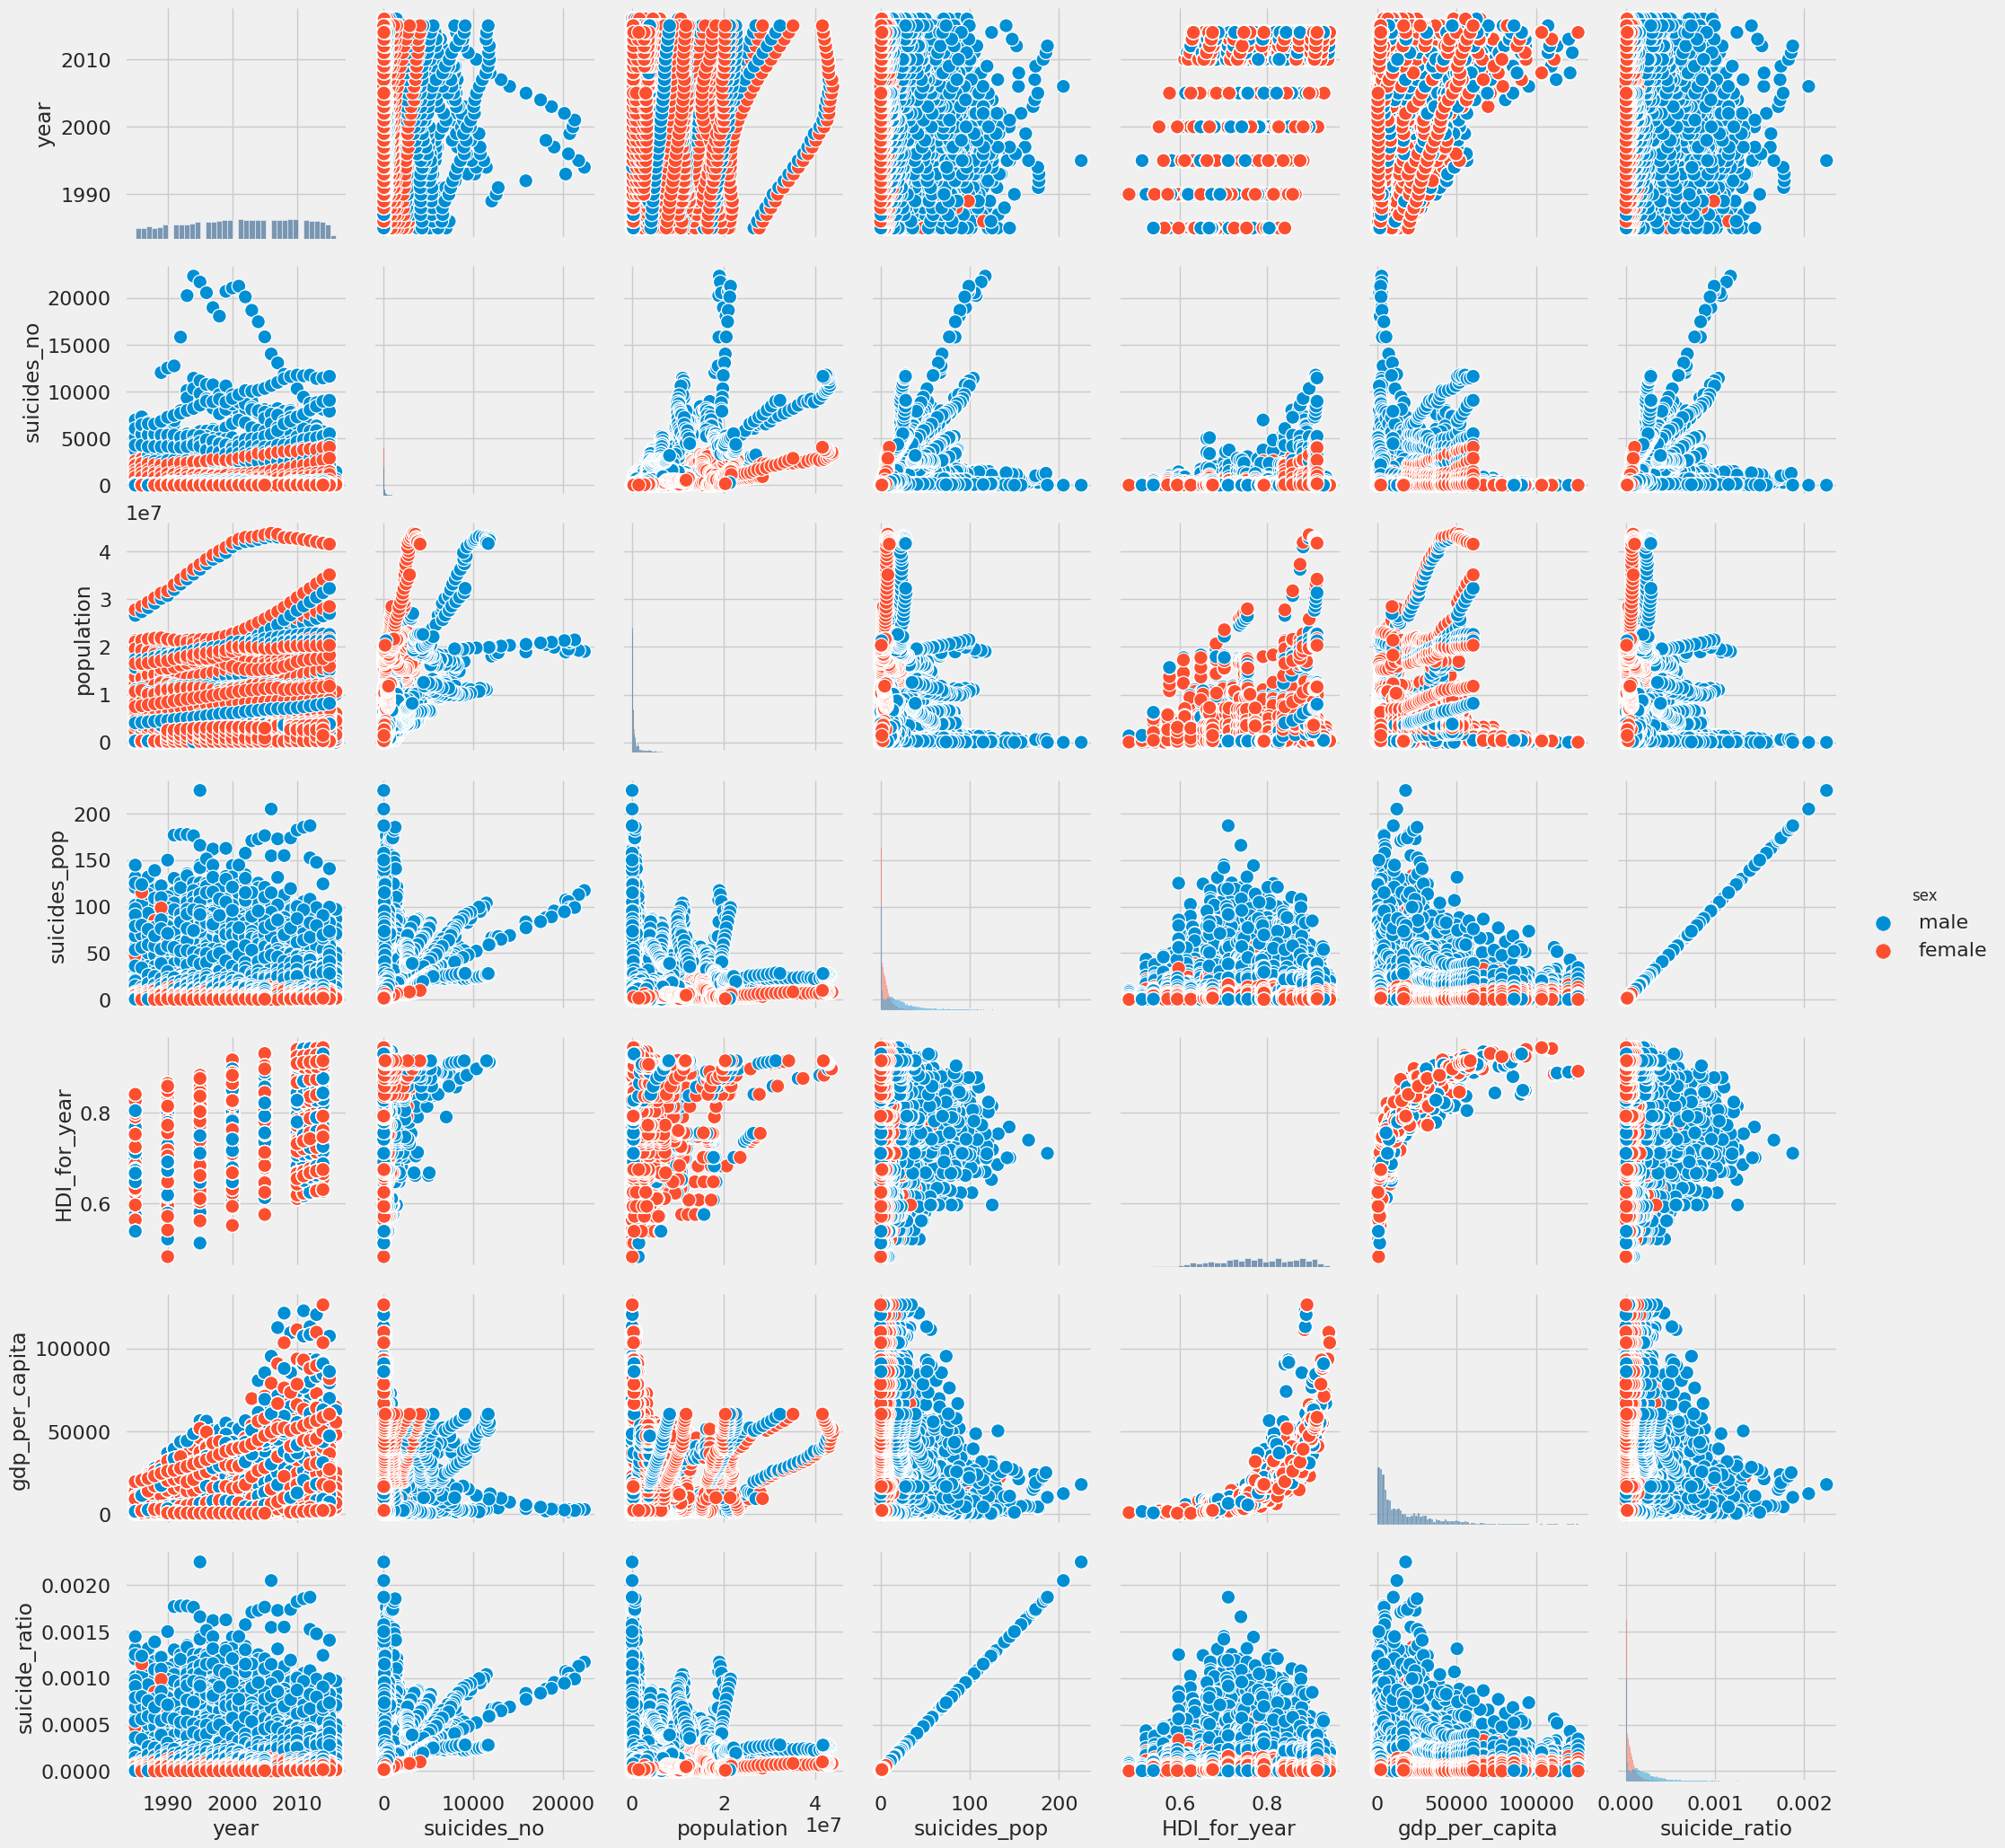

In [79]:
s=sns.pairplot(df,hue='sex',size=3,diag_kind='hist')
s.savefig("output.png")

In general, the suicide rate is related to several factors. First, national GDP per person. We have seen that the suicide rate in many countries is highly correlated with the gdp of the whole country, which shows that the degree of national wealth has a certain degree of reduction in suicide rate.

Second, the age. According to the suicide rate of each level of age, the rate of elderly is higher, so young people should care more about the elderly. Moreover, the country welfare of the elderly may also impact the rate.